In [15]:
import datatree
import xradar as xd
import pyart

In [16]:
path_dtree = "/media/alfonso/drive/Alfonso/python/raw2zarr/zarr/Guaviare_V2.zarr/"

In [18]:
dtree = datatree.open_datatree(path_dtree, engine='zarr')


In [19]:
def sel_dtime(ds, time):
    try:
        return ds.sel(vcp_time=time, method='nearest')
    except KeyError:
        return ds

In [20]:
dtree_filt = dtree.map_over_subtree(sel_dtime, time='2022-06-04 11:35')

In [22]:
dtree_filt.to_zarr('/media/alfonso/drive/Alfonso/python/open-radar-data/data/Guaviare.zarr')

In [7]:
radar = pyart.xradar.Xradar(dtree_filt, default_sweep='sweep_0')

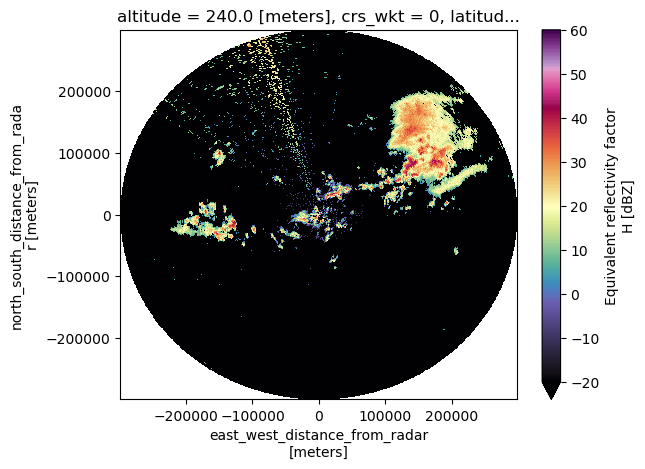

In [8]:
radar['sweep_0'].DBZH.plot(x='x', y='y', vmin=-20, vmax=60, cmap="pyart_ChaseSpectral")

In [9]:
grid = pyart.map.grid_from_radars(
    (radar,),
    grid_shape=(100, 301, 301),
    grid_limits=(
        (0, 10_000),
        (-300_000.0, 300_000.0),
        (-300_000.0, 300_000.0),
    ),
)

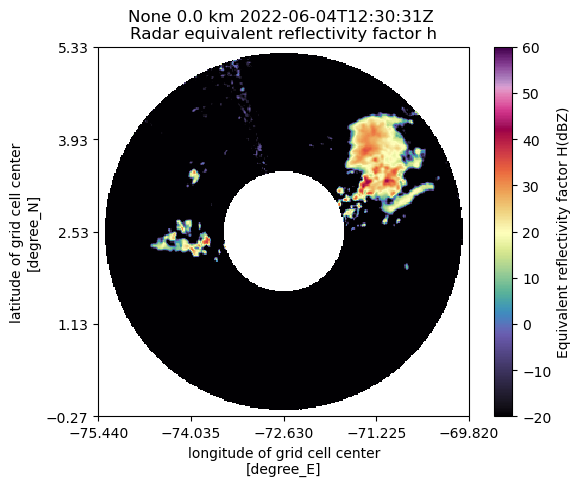

In [10]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid(
    "DBZH", level=0, vmin=-20, vmax=60, cmap="pyart_ChaseSpectral"
)

In [11]:
pyart.__version__

'1.18.1'